This is an example of using Python calculate and plot the motion of a symmetric top.
Order of variables in the array u[]:
1.    $u[0]= \theta$
1.    $u[1]=\omega\equiv\dot\theta$
1.    $u[2]= \phi$
1.    $u[3]=\psi$

The Lagrangian for this system is
$$L={1\over 2}\lambda_1\left(\dot\phi^2\sin^2\theta+\dot\theta^2\right)+{1\over 2}\lambda_3\left(\dot\psi+\dot\phi\cos\theta\right)^2-MgR\cos\theta$$
$R$ is the distance from the tip of the top to the center-of-mass, $\lambda_3$ is the moment-of-inertia about the symmetry axis, and $\lambda_1=\lambda_2$ is the degenerate moment-of-inertia about the other two principle axes (in the code below they are named $I_3$ and $I_1$).
There are three Lagrange equations, two of which correspond to conserved generalized momenta:
$$\lambda_1\ddot\theta = \lambda_1\dot\phi^2\sin\theta\cos\theta-\lambda_3\left(\dot\psi+\dot\phi\cos\theta\right)\dot\phi\sin\theta + MgR\sin\theta$$
$$p_\phi=\lambda_1\dot\phi\sin^2\theta + p_\psi\cos\theta$$
$$p_\psi=\lambda_3\left(\dot\psi+\dot\phi\cos\theta\right)$$
These lead directly to the four first-order differential equations that are fed to the ODEINT routine to integrate the motion, starting from the initial conditions:
$${d\theta\over dt}=\omega$$
$${d\omega\over dt}= \dot\phi^2\sin\theta\cos\theta-{\lambda_3\over\lambda_1}\left(\dot\psi+\dot\phi\cos\theta\right)\dot\phi\sin\theta + {1\over\lambda_1}MgR\sin\theta$$
$${d\phi\over dt}={p_\phi-p_\psi\cos\theta\over\lambda_1\sin^2\theta}$$
$${d\psi\over dt}={p_\psi\over\lambda_3}-\dot\phi\cos\theta$$
By substituting in the expressions for $\dot\phi\equiv d\phi/dt$ and $\dot\psi\equiv d\psi/dt$, the last three equations become functions of only the tipping angle $\theta$.

The initial conditions on $\theta,\dot\theta,\dot\phi,\dot\phi$ determine the values of the conserved momenta $p_\phi$ and $p_\theta$. The initial condition on $\psi$ is irrelevent, since the top is symmetric in that angle, which therefore isn't visible. The initial condition on $\phi$ is not important and may as well always be zero.
The energy is also a conserved quantity
$$E=T+U={1\over 2}\lambda_1\left(\dot\phi^2\sin^2\theta+\dot\theta^2\right)+{1\over 2}\lambda_3\left(\dot\psi+\dot\phi\cos\theta\right)^2+MgR\cos\theta$$
By making use of the conserved momenta, it can be written as an effective 1D problem:
$$E={1\over 2}\lambda_1\dot\theta^2+U_{\rm eff}(\theta)$$
where the effective potential energy function is
$$U_{\rm eff}={(p_\phi-p_\psi\cos\theta)^2\over 2\lambda_1\sin^2\theta}+{p_\psi^2\over 2\lambda_3}+MgR\cos\theta$$
The plot below of this effective potential energy function indicates the turning points of the nutation (tipping) motion. Also, the conserved energy is calculated below for the initial conditions and then again at the end of the integration. The two values should agree well if there were no significant numerical errors in the integration.

In [1]:
import mpl_toolkits.mplot3d.axes3d as p3
from scipy.integrate import odeint
from scipy.optimize import root
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import math

print()
print("Numerical solution of the symmetric top.  R. Johnson  5/23/2021")


Numerical solution of the symmetric top.  R. Johnson  5/23/2021


In [235]:
# Parameters describing the system.
L = 0.5                 # distance to the c.m. in meters
M = 5.0                 # mass in kg
g = 9.8                 # gravitational acceleration in m/s^2
beta = 2.0              # parameter that sets the moments of inertia (see I1 below)   
I1 = 2.0*M*g*L/beta     # first principal moment of inertia
I3 = 0.25*I1            # moment of inertia about the symmetry axis  
print("Parameters: beta=",beta)
print("            L=",L," meters,  M=",M," kg,   g=",g," m/s^2")
print("            I1=",I1,"    I3=",I3)

Parameters: beta= 2.0
            L= 0.5  meters,  M= 5.0  kg,   g= 9.8  m/s^2
            I1= 24.5     I3= 6.125


In [506]:
# Initial conditions
phi0 = math.pi/3                      # initial azimuthal angle
psi0 = 0.                      # initial rotation angle of the top (this has no consequence, due to the symmetry)
theta0 = 45.*math.pi/180.      # initial tip angle of the top
psiDot0 = 10.                  # initial spin rate of the top about its symmetry axis
phiDot0 = math.pi/20                   # initial precession rate
thetaDot0 = 0.                 # initial angular velocity in the tipping direction

print("Initial tipping angle is theta0=",theta0*180./math.pi," degrees")
print("    cos(theta0)=",math.cos(theta0))
print("Initial phi-dot=",phiDot0," radians/s")
print("Initial psi-dot=",psiDot0," radians/s")
print("Initial theta-dot=",thetaDot0," radians/s")

Initial tipping angle is theta0= 45.0  degrees
    cos(theta0)= 0.7071067811865476
Initial phi-dot= 0.15707963267948966  radians/s
Initial psi-dot= 10.0  radians/s
Initial theta-dot= 0.0  radians/s


In [507]:
# The conserved angular velocity about the spin axis (I3 times this is the conserved momentum conjugate to psi)
omega3 = psiDot0 + phiDot0*math.cos(theta0)    
pphi = I1*phiDot0*math.pow(math.sin(theta0),2) + I3*omega3*math.cos(theta0)
ppsi = I3*omega3
print("Conserved z component of angular momentum, p-phi=",pphi," kg m^2/s^2")
print("Conserved angular momentum about the symmetry axis, p-psi=",ppsi," kg m^2/s^2")

Omega = M*g*L/ppsi
print("Precession speed for constant precession is approximately ",Omega," radians/s")

Conserved z component of angular momentum, p-phi= 45.71557222308073  kg m^2/s^2
Conserved angular momentum about the symmetry axis, p-psi= 61.930316449905504  kg m^2/s^2
Precession speed for constant precession is approximately  0.39560592298632413  radians/s


In [508]:
def phidot(theta):
    return (pphi - ppsi*math.cos(theta))/(I1*math.pow(math.sin(theta),2))

def psidot(theta):
    return ppsi/I3 - math.cos(theta)*phidot(theta)
    
def thetaDotDot(theta):
    q1 = math.pow(phidot(theta),2)*math.sin(theta)*math.cos(theta)
    q2 = (psidot(theta) + phidot(theta)*math.cos(theta))*phidot(theta)*math.sin(theta)
    q3 = M*g*L*math.sin(theta)
    return q1 - I3*q2/I1 + q3/I1

phiDot0c = phidot(theta0)
psiDot0c = psidot(theta0)
print("Check: initial psi-dot=",psiDot0c," radians/s")
print("Check: initial phi-dot=",phiDot0c," radians/s")

Check: initial psi-dot= 10.0  radians/s
Check: initial phi-dot= 0.15707963267948988  radians/s


In [509]:
# Energy and effective potential
def Ueff(theta): 
    Ue = math.pow((pphi - ppsi*math.cos(theta)),2)/(2.*I1*math.pow(math.sin(theta),2)) + ppsi*ppsi/2./I3 + M*g*L*math.cos(theta)
    return Ue

Energy = 0.5*I1*thetaDot0*thetaDot0 + Ueff(theta0)
def func(theta):
    return Ueff(theta)-Energy
sol = root(func,math.pi/20.)
t1 = sol.x[0]
sol = root(func,math.pi/2.)
t2 = sol.x[0]
print("The conserved energy is E=",Energy," Joules")
print("First root of the potential function= ",t1*180./math.pi," degrees;   cos(theta)=",math.cos(t1))
print("Second root of the potential function=",t2*180./math.pi," degrees;   cos(theta)=",math.cos(t2))
print("Ratio of pphi/psi is u0=",pphi/ppsi)

The conserved energy is E= 330.5661910348651  Joules
First root of the potential function=  44.999999999999865  degrees;   cos(theta)= 0.7071067811865492
Second root of the potential function= 56.78936165016351  degrees;   cos(theta)= 0.5477185796240117
Ratio of pphi/psi is u0= 0.7381775977208087


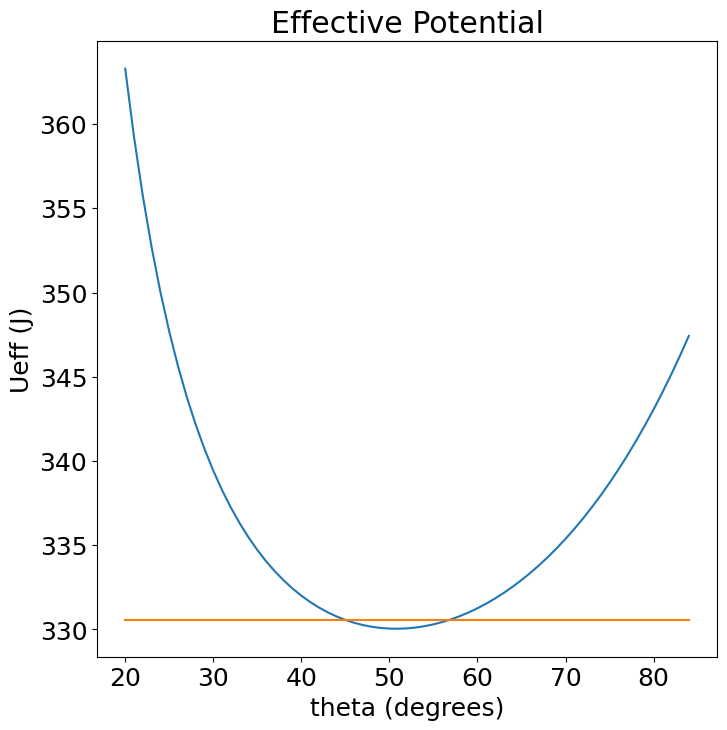

In [510]:
Nt = 65
tmin = 20.
tmax = 85.
theta = np.arange(tmin,tmax,(tmax-tmin)/Nt)
U = np.zeros(Nt)
E = np.zeros(Nt)
for i in range(Nt):
    U[i] = Ueff(theta[i]*math.pi/180.)
    E[i] = Energy
fig = plt.figure(figsize=(8,8))
ax = plt.subplot()
ax.plot(theta,U)
ax.plot(theta,E)
ax.set_xlabel('theta (degrees)')
ax.set_ylabel('Ueff (J)')
plt.title("Effective Potential")
plt.show()

In [511]:
# This function gives the time derivative of each of the 4 variables. These follow from the Lagrange equations of motion
def dudt(u, t):
    r = [0., 0., 0., 0.] 
    r[0] = u[1]
    r[1] = thetaDotDot(u[0])
    r[2] = phidot(u[0])
    r[3] = psidot(u[0])
    return r

In [512]:
# Use the scipy odeint routine to carry out the numerical integration of the system of equations.
t0 = 0.                   # start time
t1 = 20.                  # end time
N = 800                   # number of time steps

# Choose a set of time values at which to evaluate the solution y(t)
t = np.arange(t0,t1, (t1-t0)/N)

u0 = [theta0,thetaDot0,phi0,psi0]

# Call the routing from scipy that does the integration
u = odeint(dudt, u0, t)

# Check that the energy really was conserved:
Efinal = 0.5*I1*math.pow(u[N-1,1],2) + Ueff(u[N-1,0])
print("The final energy is " + str(Efinal))

font = {'size'   : 18}
plt.rc('font', **font)


The final energy is 330.56618941759166


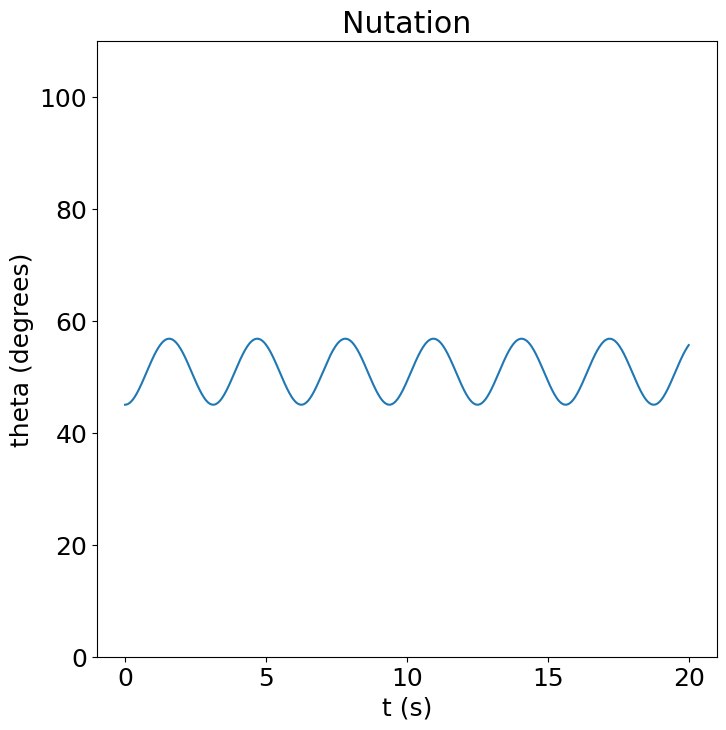

In [513]:
# Use pyplot from matplotlib to plot the theta motion (nutation)
fig = plt.figure(figsize=(8,8))
ax = plt.subplot()
ax.plot(t,u[...,0]*180./math.pi)
ax.set_xlabel('t (s)')
ax.set_ylabel('theta (degrees)')
ax.set_ylim(0.,110.)
plt.title('Nutation')
plt.show()

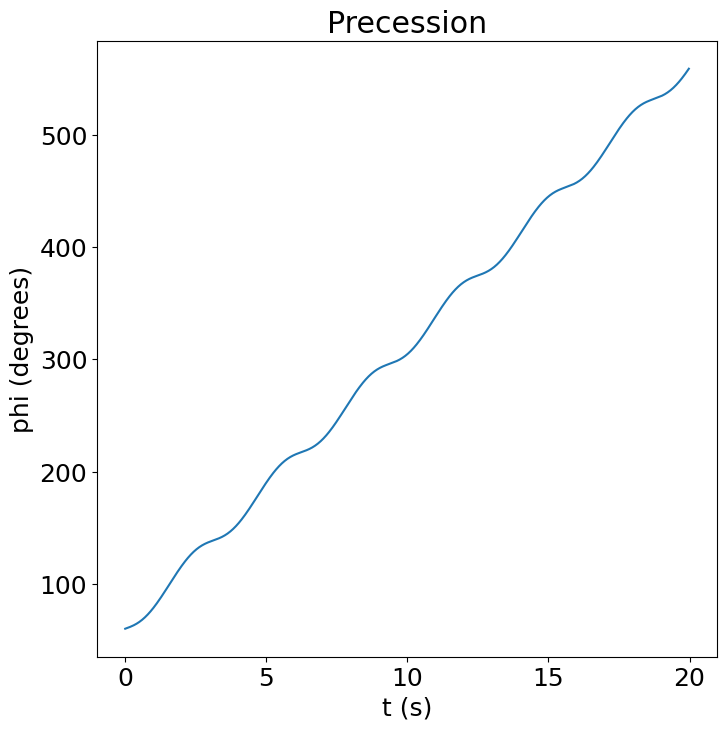

In [514]:
# Plot the phi motion (precession)
fig = plt.figure(figsize=(8,8))
ax = plt.subplot()
ax.set_xlabel('t (s)')
ax.set_ylabel('phi (degrees)')
ax.plot(t,u[...,2]*180./math.pi)
plt.title('Precession')
plt.show()

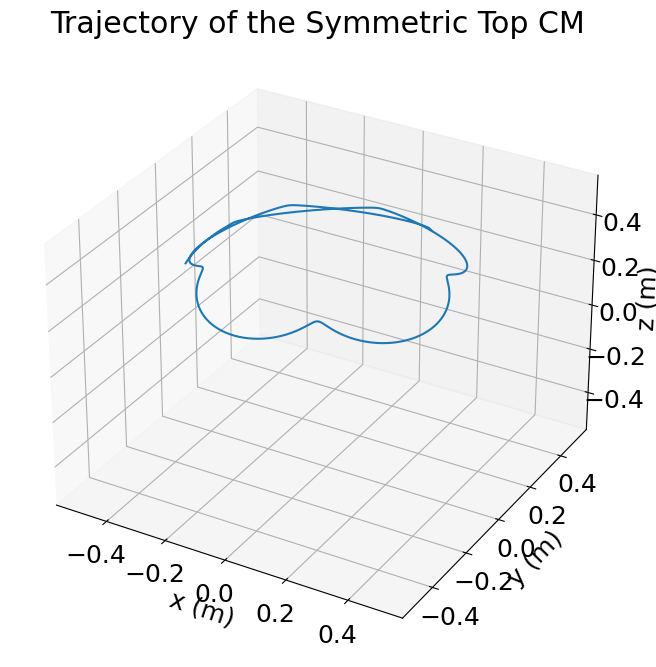

In [515]:
# Calculate and plot the 3D trajectory of the center of mass
X = np.zeros(N)
Y = np.zeros(N)
Z = np.zeros(N)
for i in range(N):
    X[i] = L*math.cos(u[i,2])*math.sin(u[i,0])
    Y[i] = L*math.sin(u[i,2])*math.sin(u[i,0])
    Z[i] = L*math.cos(u[i,0])

fig = plt.figure(figsize=(8,8))   
ax = plt.axes(projection='3d')
ax.set_xlim3d(-1.1*L, 1.1*L)
ax.set_ylim3d(-1.1*L, 1.1*L)
ax.set_zlim3d(-1.1*L, 1.1*L)
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('z (m)')
ax.set_aspect('auto')
plt.title('Trajectory of the Symmetric Top CM')
ax.plot3D(X,Y,Z)
plt.show()